# _Solanum sp._ Chromosomes 1, 7, and ASR locus (chr. 4)

## Introduction

_Solanum_ is a large genus of over 1200 species of flowering plants in the nightshade family _Solanaceae_. This includes many economically important species like tomatoes (_S. lycospericum_), eggplant (_S. melongena_), and potatoes (_S. tuberosum_). The phylogeny is complex, but mostly contains two larger clades ([Messeder et. al.](https://doi.org/10.1111/nph.19849)), of which Clade I contains tomatoes (informally, section _Lycopersicon_). 

![tomato phylogeny](data/tomato_clades_messeder.png)

Moderm tomatoes are mostly varieites of _S. lycospericum_, but wild species and wild-crop hybrids grow readily in warm regions of the Americas. It is proposed that _S. pimpinellifolium_ may be a wild ancestor of modern tomatoes, and may have contributed a significant portion of genetic material to _S. lycospericum_. However, more recent admixture has occured, either naturally by intentional breeding, that has conferred traits like disease resistance into moderm varieties ([Menda et. al.](https://doi.org/10.1186/s12870-014-0287-2))

Here, I propose an analysis on chromosomes 1 and 7 of the tomato genome to detect introgressive and selective signals, particularly at loci connected to drought tolerance (below):

- __Chromosome 1__ (SlAREB1, PRXIIF, SAP5, REF4-1, LCD, CCD1, SCS)
- __Chromosome 7__ (Sec14-like PITP, AHG2, PRXQ, CFS1)
- __ASR locus (Chromosome 4)__ (ASR1 and ASR4)

## Methods

This analysis will leverage SNP data from the __Sol Genomics Network__'s ["varitome project"](https://solgenomics.sgn.cornell.edu/projects/varitome). First we will convert vcf files to hdf5, extract relevant samples, and perform PCA, nucleotide diversity, pairwise Fst, and D+ tests.

#### __Step 1:__ Data `.vcf` to `.h5` processing

In [3]:
import ipyrad.analysis as ipa
import pandas as pd
import sklearn
import numpy as np
import allel

In [ ]:
%%bash

# compress the VCF file if not already done (creates .vcf.gz)
# bgzip data/ch01.vcf

# remove multi-allelic SNPs and INDELs and PIPE to next command
bcftools view --types snps -Ou -o data/ch01.cleaned.vcf data/ch01.vcf.gz

# recompress the final file (create .vcf.gz)
bgzip data/ch01.cleaned.vcf

In [4]:
allel.vcf_to_hdf5('data/ch01.cleaned.vcf.gz', 'data/ch01.convert.h5')

In [ ]:
# # load the VCF as an datafram
# dfchunks = pd.read_csv(
#     "data/ch01.cleaned.vcf.gz",
#     sep="\t",
#     skiprows=1000,
#     chunksize=1000,
# )

# # show first few rows of first dataframe chunk
# next(dfchunks).head()

,SL2.50ch01,190784,SL25ch01p190784,G,A,.,..1,..2,GT,0/0,...,0/0.145,0/0.146,0/0.147,0/0.148,0/0.149,1/1.11,0/0.150,0/0.151,0/0.152,0/0.153
0,SL2.50ch01,190917,SL25ch01p190917,C,G,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0
1,SL2.50ch01,190950,SL25ch01p190950,T,G,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0
2,SL2.50ch01,191142,SL25ch01p191142,T,A,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0
3,SL2.50ch01,191409,SL25ch01p191409,C,G,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0
4,SL2.50ch01,191554,SL25ch01p191554,A,T,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,0/0,0/0


In [ ]:
# # init a conversion tool
# converter = ipa.vcf_to_hdf5(
#     name="S.lycospericum_chr1",
#     data="data/ch01.cleaned.vcf.gz",
#     ld_block_size=20000,
# )

# # run the converter
# converter.run()

Indexing VCF to HDF5 database file
VCF: 511165 SNPs; 1 scaffolds
[                    ]   0% 0:00:00 | converting VCF to HDF5 

/Users/pgundral/gitrepos/solanum-introgression/.conda/lib/python3.11/site-packages/ipyrad/analysis/vcf_to_hdf5.py:525: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ref = chunkdf.iloc[:, 3].astype(bytes).view(np.int8).values


[###                 ]  19% 0:00:08 | converting VCF to HDF5 

/Users/pgundral/gitrepos/solanum-introgression/.conda/lib/python3.11/site-packages/ipyrad/analysis/vcf_to_hdf5.py:525: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ref = chunkdf.iloc[:, 3].astype(bytes).view(np.int8).values


[#######             ]  39% 0:00:16 | converting VCF to HDF5 

/Users/pgundral/gitrepos/solanum-introgression/.conda/lib/python3.11/site-packages/ipyrad/analysis/vcf_to_hdf5.py:525: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ref = chunkdf.iloc[:, 3].astype(bytes).view(np.int8).values


[###########         ]  58% 0:00:24 | converting VCF to HDF5 

/Users/pgundral/gitrepos/solanum-introgression/.conda/lib/python3.11/site-packages/ipyrad/analysis/vcf_to_hdf5.py:525: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ref = chunkdf.iloc[:, 3].astype(bytes).view(np.int8).values


[###############     ]  78% 0:00:31 | converting VCF to HDF5 

/Users/pgundral/gitrepos/solanum-introgression/.conda/lib/python3.11/site-packages/ipyrad/analysis/vcf_to_hdf5.py:525: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ref = chunkdf.iloc[:, 3].astype(bytes).view(np.int8).values


[################### ]  97% 0:00:40 | converting VCF to HDF5 

/Users/pgundral/gitrepos/solanum-introgression/.conda/lib/python3.11/site-packages/ipyrad/analysis/vcf_to_hdf5.py:525: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ref = chunkdf.iloc[:, 3].astype(bytes).view(np.int8).values


[####################] 100% 0:00:41 | converting VCF to HDF5 
HDF5: 511165 SNPs; 4391 linkage group
SNP database written to ./analysis-vcf2hdf5/S.lycospericum_chr1.snps.hdf5


In [ ]:
# pca = ipa.pca(
#     data="./analysis-vcf2hdf5/S.lycospericum_chr1.snps.hdf5",
#     mincov=1.0,
# )

Samples: 166
Sites before filtering: 511165
Filtered (indels): 0
Filtered (bi-allel): 0
Filtered (mincov): 347441
Filtered (minmap): 0
Filtered (subsample invariant): 0
Filtered (minor allele frequency): 0
Filtered (combined): 347441
Sites after filtering: 163724
Sites containing missing values: 0 (0.00%)
Missing values in SNP matrix: 0 (0.00%)
SNPs (total): 163724
SNPs (unlinked): 3777


#### __Step 2:__ Extracting and transforming `.h5` data

In [ ]:
# Import modules.
import allel
import h5py
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [ ]:
# Load the hdf5 data.
chr1_data = h5py.File('./analysis-vcf2hdf5/ch01.cleaned.h5', mode='r')
# Extract the genotypes.
chr1_gt = allel.GenotypeArray(chr1_data['calldata/GT'][:])
# Extract the variable positions array.
chr1_pos = allel.SortedIndex(chr1_data['variants/POS'][:])
# Extract the samples array.
chr1_samps = np.array([samp.decode() for samp in chr1_data['samples'][:]])

In [9]:
# Adjust the total chromosome length for 50kb windows.
chr1_adj_len = (97790682 // 50_000) * 50_000
# Intialize a dicctionary with the start and stop position for each window.
wind_dicc = {}
# Intialize a midpoint list.
mid_points = []
# Intialize a window index counter.
index = 0
# For all 50kb window...
for window_start in range(1, 97790682, 50_000):
    # If this is the last window...
    if window_start == 97790682:
        # Break the for loop since there are too few sites in the last window.
        break
    # Else...
    else:
        # Fill the dictionary with the position indices.
        wind_dicc[index] = np.where(((window_start <= chr1_pos) & (chr1_pos < (window_start + 50_000))))[0]
        # Append the midpoint list.
        mid_points.append(window_start + 25_000)
        # Move the window index forward.
        index += 1
# # Determine the optix gene indices.
# optix_idx = np.where(((1058778 <= chr1_pos) & (chr1_pos <= 1159581)))[0]
# # Intialize the windows the optix gene is in.
# optix_wind = np.array([21, 22, 23])
# # Intialize the x-axis ticks.
# x_ticks = np.arange(0, 350, 30)
# # Intialize the x-axis tick labels.
# x_labels = (np.arange(0, chr18_adj_len, 1_500_000) / 1_000_000).astype(str)

In [17]:
# Extract the species id from samples labels.
species_id = [sample.split('_')[0] for sample in chr1_samps]
# Create a metadata dataframe.
chr1_meta_df = pd.DataFrame({'samples': chr1_samps, 'species': species_id})
# Extract the unique sample ids.
chr1_species = chr1_meta_df['species'].unique()
# Subset the focal species.
focal_chr1_species = chr1_species[:-1]
# Intialize a dictionary to store sample ids.
chr1_idx_dicc = {}
# For every species...
for spc in chr1_species:
    # Fill the dictionary.
    chr1_idx_dicc[spc] = chr1_meta_df[chr1_meta_df['species'] == spc].index.values

In [18]:
# Convert the genotypes to an alternative allele count matrix.
chr1_aac = chr1_gt.to_n_alt(fill=np.nan, dtype=np.float64)
# Intialize an allele count matrix dictionary.
chr1_aac_dicc = {}
# intialize a alternative allele frequency dictionary.
chr1_freq_dicc = {}
# For every species...
for spc in chr1_species:
    # Fill the dictionary with the subsetted alternative allele count matrix.
    chr1_aac_dicc[spc] = chr1_aac[:, chr1_idx_dicc[spc]]
    # Determine the number of chromosomes with allele calls.
    called_chroms = np.count_nonzero(~np.isnan(chr1_aac_dicc[spc]), axis=1) * 2
    # Determine the allele counts of the derived/alternative allele.
    per_site_aac = np.nansum(chr1_aac_dicc[spc], axis=1)
    # Fill the frequency dictionary.
    chr1_freq_dicc[spc] = per_site_aac / called_chroms

/var/folders/wg/d2mg01mn4796lx7m_nt42y600000gn/T/ipykernel_3286/3558686998.py:16: RuntimeWarning: invalid value encountered in divide
  chr1_freq_dicc[spc] = per_site_aac / called_chroms


#### __Step 3:__ PCA on all samples

In [24]:
all_aac = np.nan_to_num(chr1_aac, nan=0)

In [25]:
# Calculate the column mean vector.
mu_vec = np.mean(all_aac, axis=0)
# Calculate the column allele frequency vector.
p_vec = mu_vec / 2
# Calculate the standard deviation vector.
std_vec = np.sqrt(((all_aac.shape[0] * 2) * p_vec * (1 - p_vec)))
# Convert the C matrix to a zero centered M matrix.
M_mat = (all_aac - mu_vec) / std_vec

In [26]:
# Compute the covariance matrix.
X_mat = np.cov(M_mat, rowvar=False)

In [27]:
# Compute the eigen -values and -vectors.
eig_vals, eig_vecs = np.linalg.eig(X_mat)
# Sort the -values and -vectors.

# Sort the eigen vales and pick the corresponding eigen vectors (Principal components)
eig_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[eig_idx]
eig_vecs = eig_vecs[:, eig_idx]

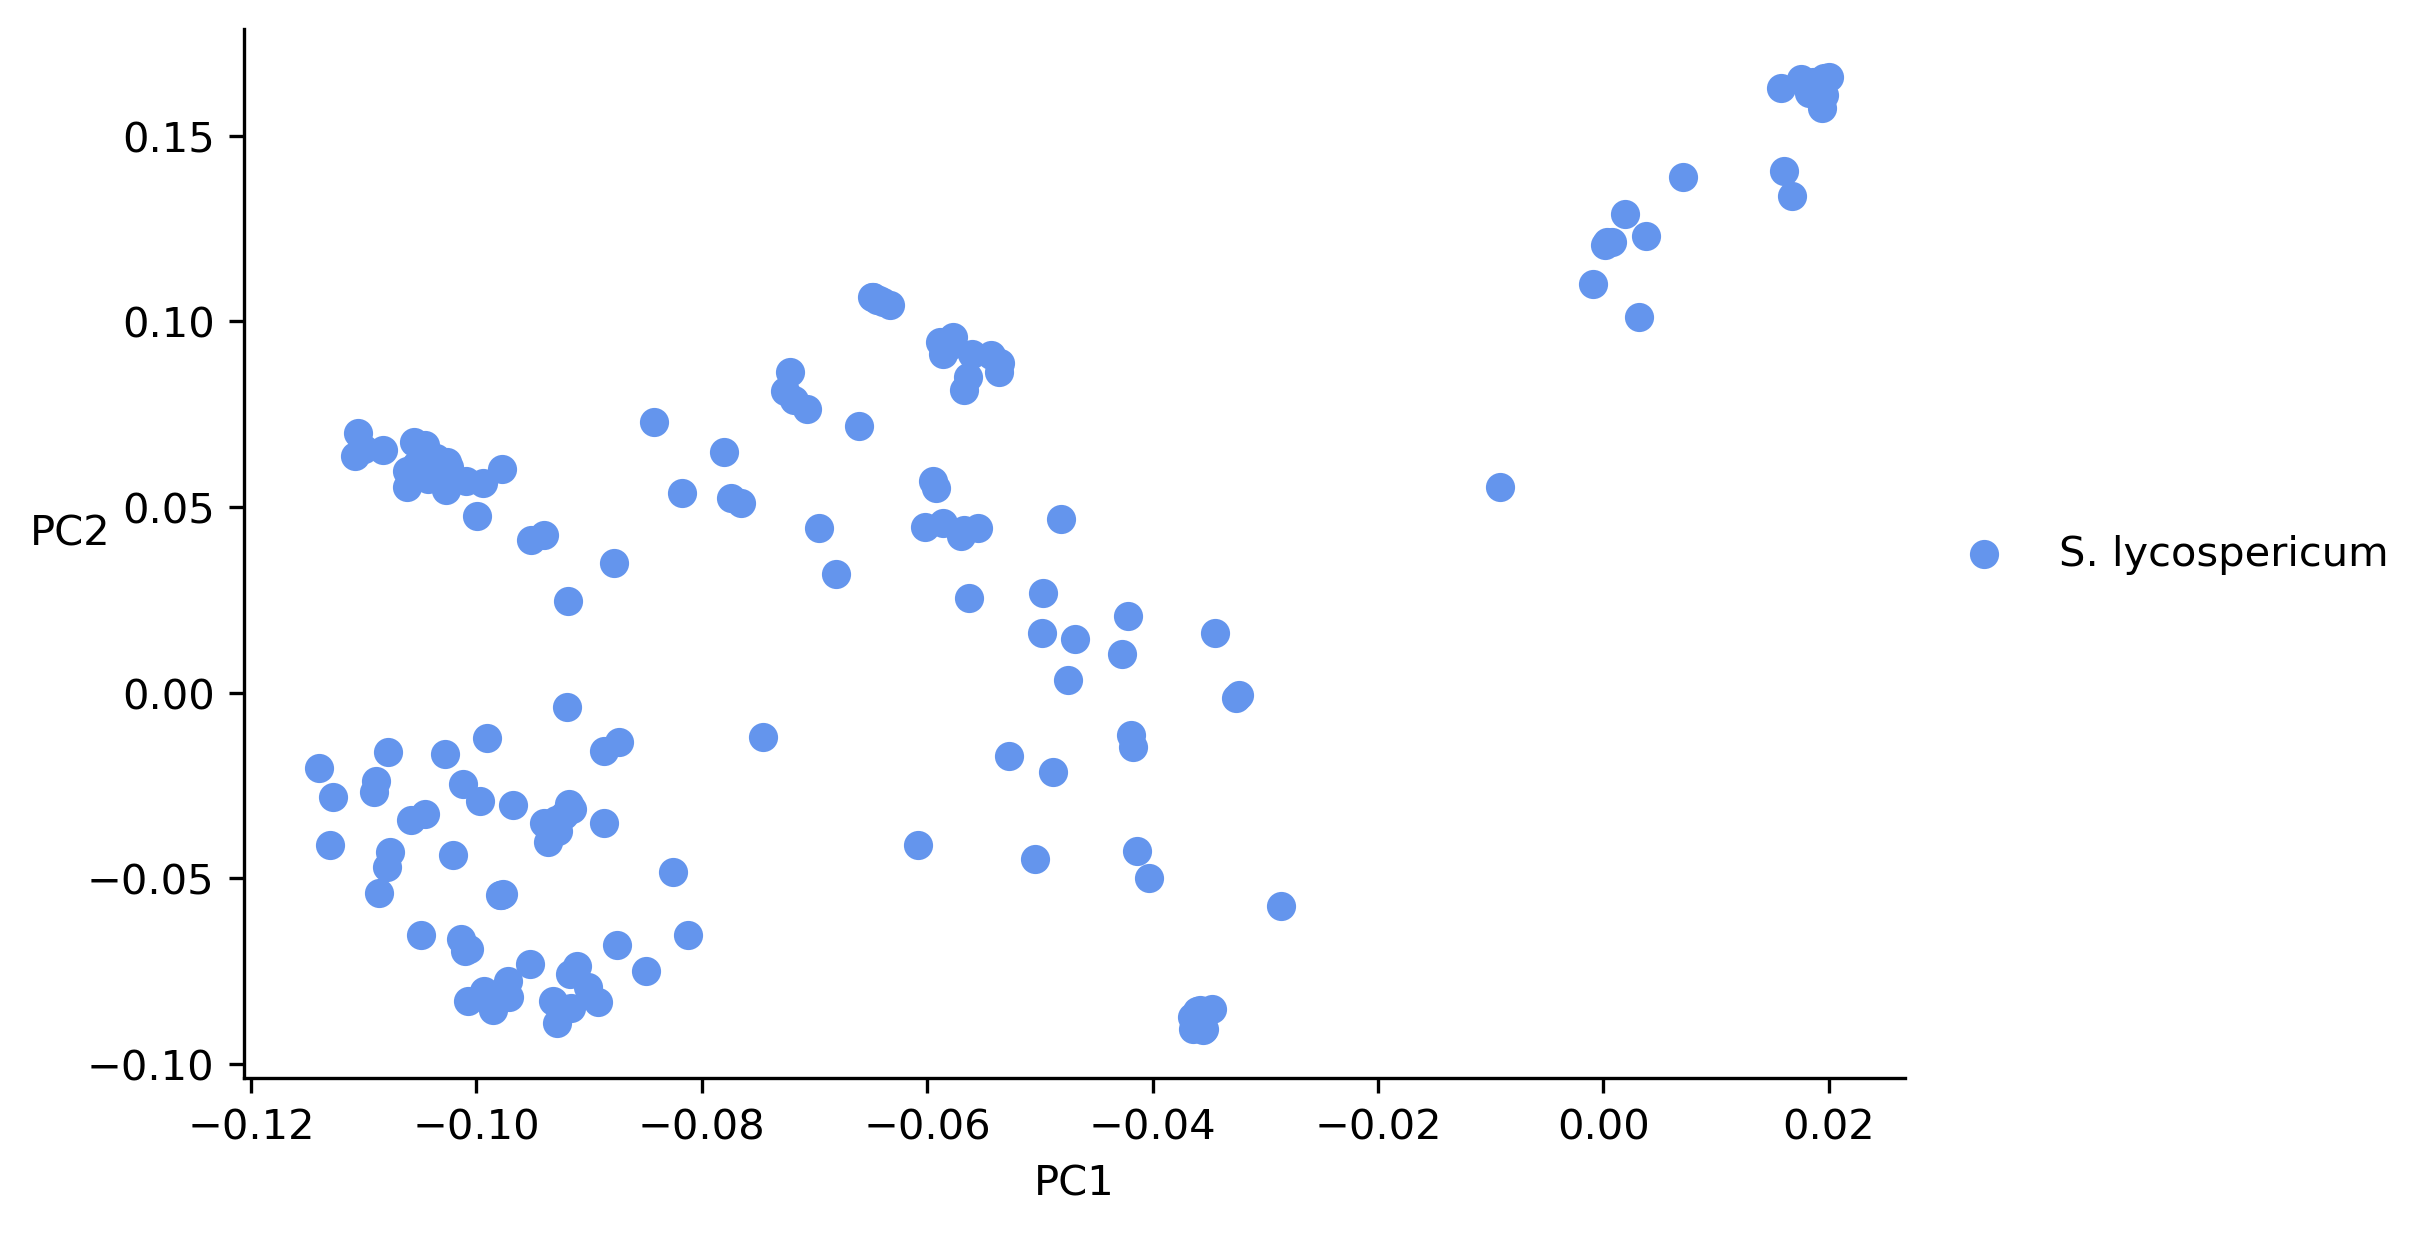

In [30]:
## PLOTTING ##

# Intialize the figure.
fig = plt.figure(figsize=(8, 4), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)

# Plot rosina, malleti, amaryllis, chioneus, florencia.
ax.scatter(
    eig_vecs[:, 0], eig_vecs[:, 1],
    color='cornflowerblue', label='S. lycospericum',
)

# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Plot the legend.
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Label the axes.
plt.xlabel('PC1')
plt.ylabel('PC2', rotation=0)
# Show!
plt.show()